In [88]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# Histogram
Histrograms is a graph that represents Pixel intensities in one Axis and the frequency in y axis.

0
255
(733, 1100, 3)
(733, 1100)


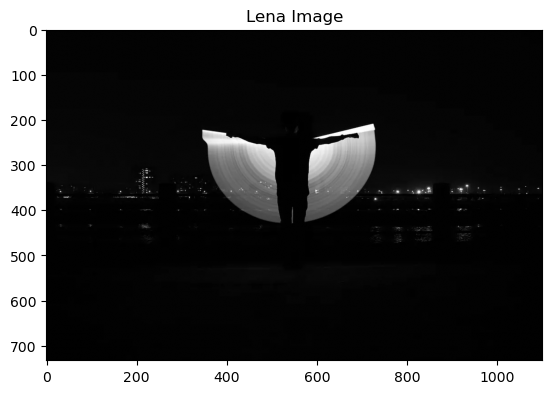

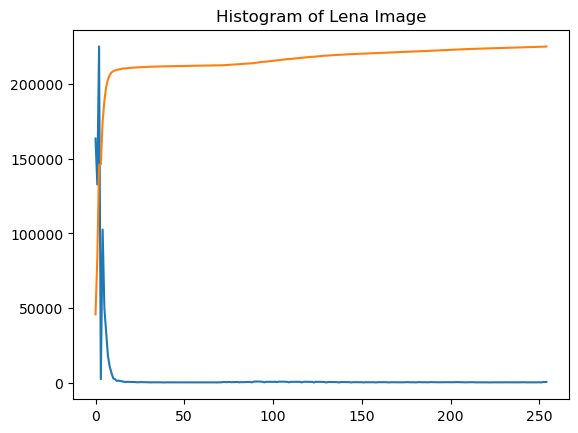

In [135]:
# Sample Histogram
bgr_img = cv2.imread("images/dark_image.png", cv2.IMREAD_COLOR_BGR)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
print(gray_img.min())
print(gray_img.max())
print(bgr_img.shape)
print(gray_img.shape)
# Calculate the histogram and cummulative distribution
gray_img_histogram = cv2.calcHist([gray_img], [0], None, [255], [0,256])
gray_img_cdf = gray_img_histogram.cumsum()
gray_img_cdf_norm = gray_img_cdf / gray_img_cdf.max()

plt.imshow(gray_img, cmap = "gray")
plt.title("Lena Image")
plt.show()
plt.plot(gray_img_histogram)
plt.plot(gray_img_cdf_norm * gray_img_histogram.max())
plt.title("Histogram of Lena Image")
plt.show()

## Histogram Equalisation
Histogram equalization is a technique to redistribute pixel intensity values so that the histogram becomes more spread out (closer to flat). This enhances contrast: dark regions become brighter, and bright regions may get slightly darker, making details more visible.\
### Procedure
1. Compute the Cumulative Distribution Function (CDF) of the histogram, and identify the smallest non-zero CDF value.
2. Map each intensity value to a new one using the formula:\
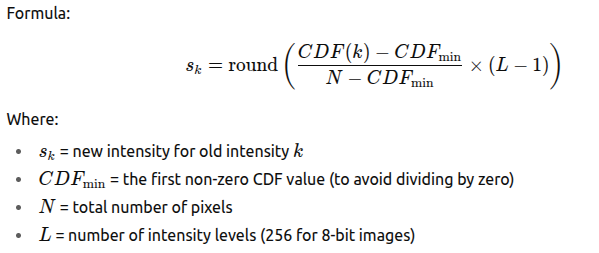\

Explanation of the Equation
- CDF(k) - Fraction of pixels with intensity values from 0 up to k.
- Subtracting CDF(min) - CDF(min): Ensures that the smallest intensity maps to 0.\
Example: If the first non-zero CDF occurs at pixel value 50 with CDF = 0.04N, then subtracting it gives 0.04N−0.04N=0. Thus pixel value 50 maps to 0.
- Dividing by N−CDF(min): Keeps the mapping normalized within [0,1]. Since we subtracted CDF(min) in the numerator, the maximum would otherwise never reach 1. Subtracting it in the denominator fixes this, so the brightest pixel maps to 1.
- Multiplying by (L–1): Expands the normalized values to the full intensity range (e.g., 0–255 for 8-bit images).
- Rounding: Ensures pixel intensities remain integers.

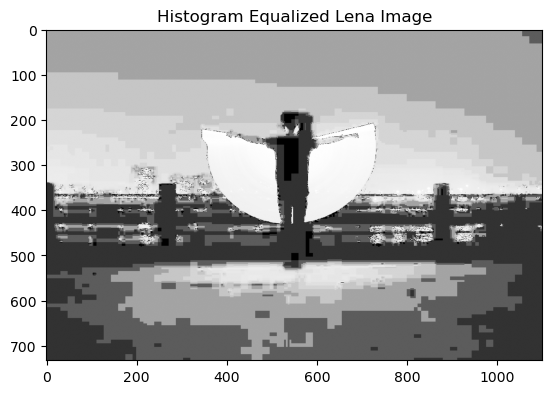

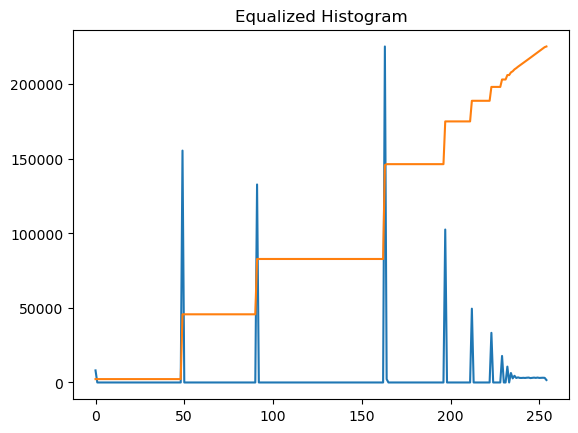

In [136]:
gray_img_equalized = cv2.equalizeHist(gray_img)
gray_img_equalized_histogram = cv2.calcHist([gray_img_equalized], [0], None, [255], [0, 256])
gray_img_equalized_cdf = gray_img_equalized_histogram.cumsum()
gray_img_equalized_cdf_norm = gray_img_equalized_cdf / gray_img_equalized_cdf.max()

plt.imshow(gray_img_equalized, cmap = "gray")
plt.title("Histogram Equalized Lena Image")
plt.show()
plt.plot(gray_img_equalized_histogram)
plt.plot(gray_img_equalized_cdf_norm * gray_img_equalized_histogram.max())
plt.title("Equalized Histogram")
plt.show()


## CLAHE (Contrast Limited Adaptive Histogram Equalisation)
Histogram Equalisation will fail in uneven lighting conditions. CLAHE will do an adaptive equalisation by separating the image into blocks.\
### Procedure
1. Separate the image into blocks.
2. Calculate the histogram for each block.
3. Set a clip limit for number of pixels in each bin. If any of the bins has number of pixels greater than the clip then re distribute the remaining pixels to other bins.
4. Perform Histogram Equalisation to all the tiles.
5. Final image is obtained by interpolating the equalised tiles.

### Tips
- If the clip limit is very high then there is a possibility that a specific bin will have a peak in some blocks hence equalisation does not have any effect in that block.\
eg. consider a 10x10 block which will have 100 pixels. If there is a specific pixel intensity with 80 pixel frequency, histogram equalisation will not have any effect in that situation. But, if that 80 pixels is clipped by some value and then equalisatio happens then the curve will be a bit spreadout and the equalisation will have an impact.

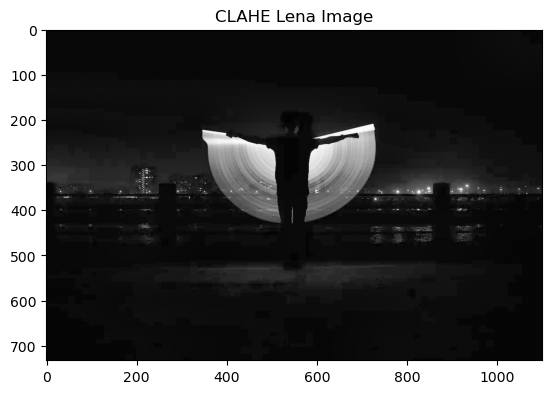

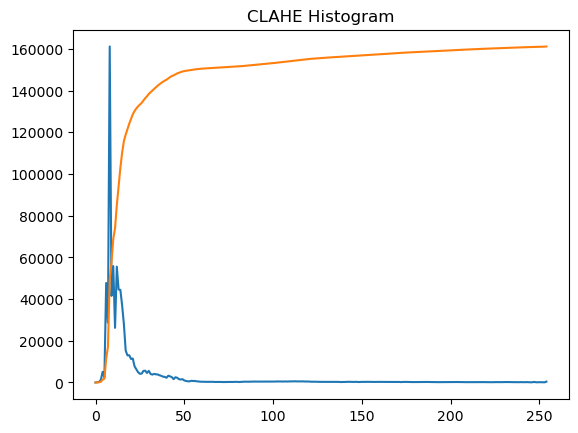

In [154]:
# Increase the clipLimit to see noise in the image
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
clahe_gray_img = clahe.apply(gray_img)

clahe_gray_img_histogram = cv2.calcHist([clahe_gray_img], [0], None, [255], [0,256])
clahe_gray_img_histogram_cdf = clahe_gray_img_histogram.cumsum()
clahe_gray_img_histogram_cdf_norm = clahe_gray_img_histogram_cdf / clahe_gray_img_histogram_cdf.max()

plt.imshow(clahe_gray_img, cmap = "gray")
plt.title("CLAHE Lena Image")
plt.show()
plt.plot(clahe_gray_img_histogram)
plt.plot(clahe_gray_img_histogram_cdf_norm * clahe_gray_img_histogram.max())
plt.title("CLAHE Histogram")
plt.show()

## Comparision
The Histogram of the original Image tend to have 2 major peaks.\
After Performing Histogrma Equalisation, the peaks tend to spread out but in a small scale.
Afer performing CLAHE the peaks tend to spread even more kind of a merged single peak. 

Text(0.5, 1.0, 'CLAHE Histogram')

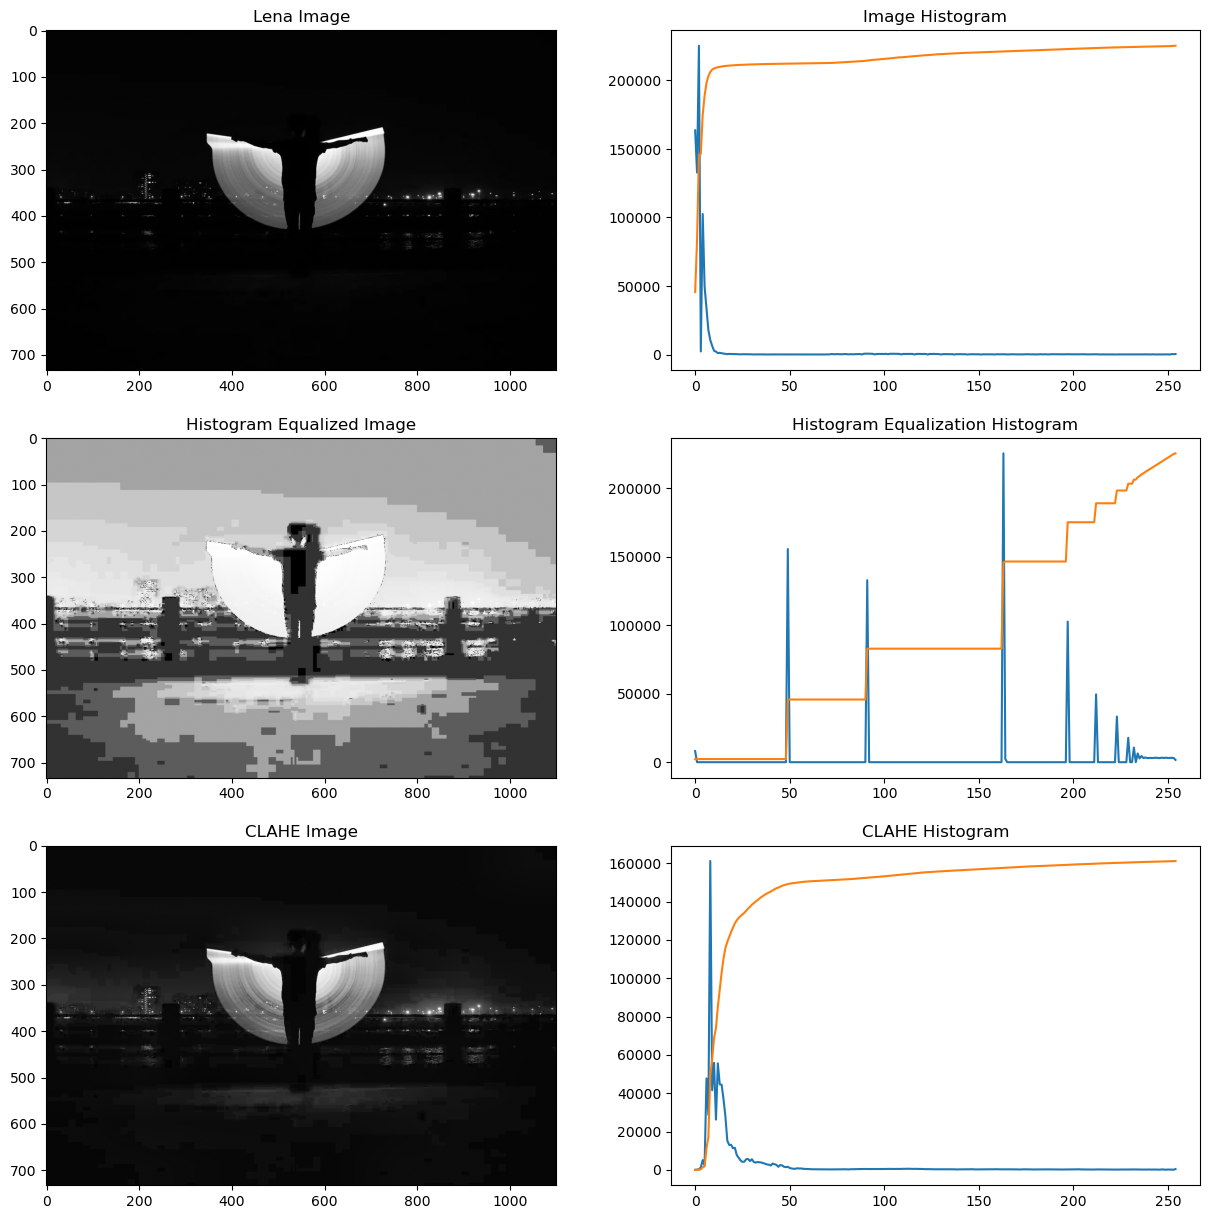

In [155]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.imshow(gray_img, cmap ="gray")
plt.title("Lena Image")
plt.subplot(3,2,2)
plt.plot(gray_img_histogram)
plt.plot(gray_img_cdf_norm * gray_img_histogram.max())
plt.title("Image Histogram")

plt.subplot(3,2,3)
plt.imshow(gray_img_equalized, cmap ="gray")
plt.title("Histogram Equalized Image")
plt.subplot(3,2,4)
plt.plot(gray_img_equalized_histogram)
plt.plot(gray_img_equalized_cdf_norm * gray_img_equalized_histogram.max())
plt.title("Histogram Equalization Histogram")

plt.subplot(3,2,5)
plt.imshow(clahe_gray_img, cmap ="gray")
plt.title("CLAHE Image")
plt.subplot(3,2,6)
plt.plot(clahe_gray_img_histogram)
plt.plot(clahe_gray_img_histogram_cdf_norm * clahe_gray_img_histogram.max())
plt.title("CLAHE Histogram")